In [27]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import scipy
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as R
from scipy import ndimage
from skimage.filters import threshold_otsu

def get_regions(mask_id):
    # Post-processing
    mask = (mask_id != 0).astype(int)
    mask_separated = mask

    # detect separated regions
    s = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
    mask_regions, num_regions = scipy.ndimage.label(mask_separated, structure=s)

    return mask_regions, num_regions

(480, 640, 3)


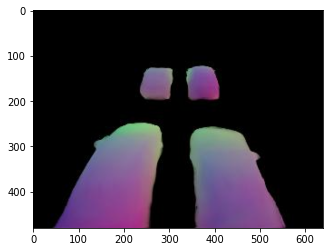

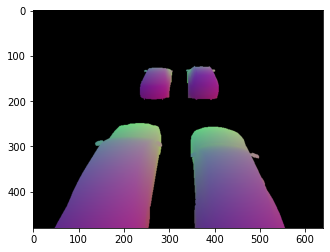

error mse 0.0021792469
error l1 0.0057844785


In [39]:
path  = '/home/zubairirshad/generalizable-object-representations/ckpts/single_map_tpnocs_fusion_CONV_dbias_distloss_far0.3_tp120160/3viewLPIPS_novelobj_SrcView'

#path = '/home/zubairirshad/generalizable-object-representations/ckpts/single_scene_topnocs_highres'
#nocs_pred_path = os.path.join(path, 'nocs_000.png')
nocs_pred_path = os.path.join(path, 'nocs000.jpg')
nocs = np.array(Image.open(nocs_pred_path))
nocs = cv2.resize(nocs.astype(np.uint8), None, fx=2., fy=2., interpolation=cv2.INTER_NEAREST)

print(nocs.shape)
h,w,_ = nocs.shape

nocs_gt_path = os.path.join(path, 'nocs_gt000.png')
nocs_gt = Image.open(nocs_gt_path)
# nocs_gt = nocs_gt.resize((w,h), Image.LANCZOS)

nocs_gt = np.array(nocs_gt).astype(np.float32) / 255.0

nocs = np.array(nocs).astype(np.float32) / 255.0


plt.imshow(nocs)
plt.show()
plt.imshow(nocs_gt)
plt.show()

# print("nocs", nocs)
# print("nocs", nocs_gt)
error = np.mean((nocs-nocs_gt)**2)
error_l1 = np.mean((nocs-nocs_gt))
print("error mse",error)
print("error l1",error_l1)

In [16]:
thresh = threshold_otsu(nocs.mean(2))
mask = (nocs.mean(2) > thresh).astype(float)
mask = ndimage.binary_erosion(mask, structure=np.ones((5,5))).astype(float)

# cam = cam/2
# cam[-1,-1] = 1

mask_regions, num_regions = get_regions(mask)


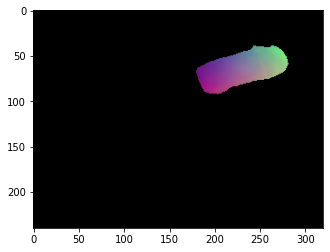

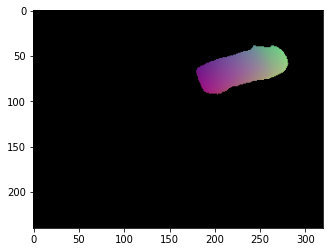

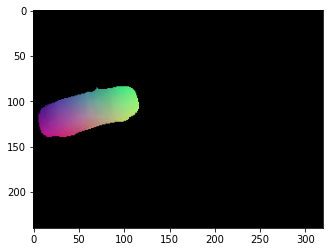

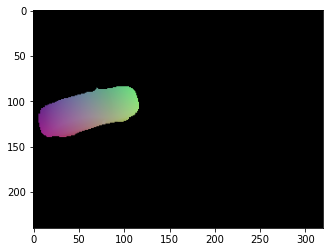

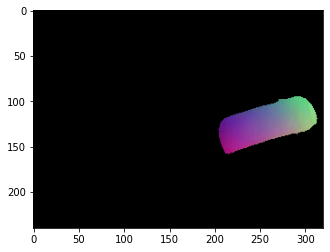

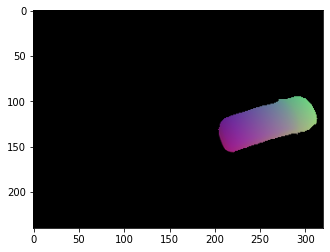

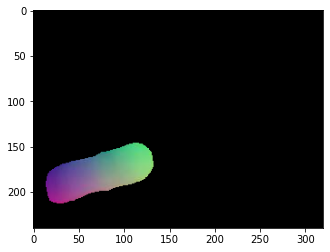

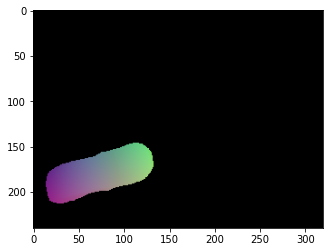

In [19]:
for region_ind in range(1, num_regions + 1, 1):
    region_mask = (mask_regions == region_ind).astype(int)
    region_area = np.count_nonzero(region_mask)
    nocs_region = nocs * np.transpose(np.tile(region_mask, (nocs.shape[2], 1, 1)), (1, 2, 0))
    nocs_region_gt = nocs_gt * np.transpose(np.tile(region_mask, (nocs.shape[2], 1, 1)), (1, 2, 0))
    
    
    plt.imshow(nocs_region)
    plt.show()
    
    plt.imshow(nocs_region_gt)
    plt.show()